<a href="https://colab.research.google.com/github/michaelwnau/ai-academy-machine-learning-2023/blob/main/EMGMM_Kmeans_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 4 - Session 2 : EM & GMM vs. K-means

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This code is released under the MIT license.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None, xlabel='', ylabel=''):
    """ Draw a scatter plot for X associated with gmm result"""
    # gmm: initialized GMM model
    # X: loaded dataset

    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)

    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=15, alpha=0.5, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

    ax.set_xlabel(xlabel, fontsize=16) # added
    ax.set_ylabel(ylabel, fontsize=16)

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None, xlabel='', ylabel=''):
    """ Draw a scatter plot for X associated with gmm result"""
    # kmeans: initialized K-Means model
    # X: loaded dataset

    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=15, alpha = 0.5, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

    ax.set_xlabel(xlabel, fontsize=16) # added
    ax.set_ylabel(ylabel, fontsize=16)


def plot_scatter(X, xlabel='', ylabel=''):
    """ Draw a scatter plot for X """
    # X: loaded dataset

    plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)


# Train GMM and show the learned parameters and predicted labels
def train_gmm(gmm, data):
    labels = gmm.fit(data).predict(data)
    gmm.fit(data).predict(data)
    print("n_iter_: {} \t(converged_: {})\nwegiths_: {}\nmeans_: {}\ncovariances_:\n{}".format(gmm.n_iter_,
                                     gmm.converged_, gmm.weights_.round(3), gmm.means_.round(3),
                                     gmm.covariances_.round(3)))
    print("first 20 labels: {} ...".format(labels[:20]))

# Train K-means and show the learned parameters and predicted labels
def train_kmeans(kmeans, data):
    labels = kmeans.fit_predict(data)
    print("n_iter_: {} \ncluster_centers_:\n{}".format(kmeans.n_iter_, kmeans.cluster_centers_.round(3)))
    print("first 20 labels: {} ...".format(labels[:20]))

### Question 1 >>
* Load and plot the data.
* What do you observe?

data.shape = (400, 2)


<ipython-input-2-42244d7322c2>:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')


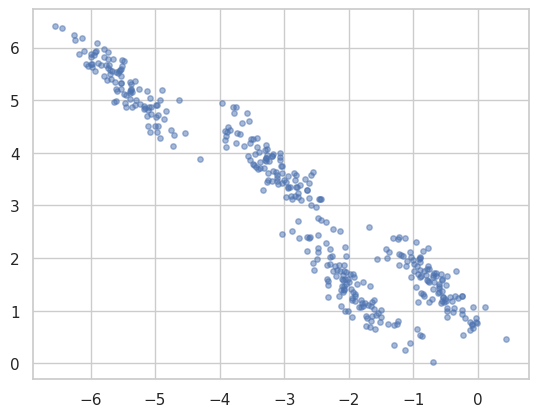

In [5]:
# 1. Load dataset - "EMGMM_Kmeans_dataset.npy"
data = np.load("/content/drive/MyDrive/week-4/3_W4S2_Code_Clustering/3_W4S2_Code_Clustering/EMGMM_Kmeans_dataset.npy")

# 1-1. Print the shape of data
print("data.shape = {}".format(data.shape))

# 1-2. Draw a scatter plot - use the 'plot_scatter' function.
plot_scatter(data)

### Question 2 >>
* Train GMMs and K-means, check the predicted labels and the learned parameters of each model:
  - GMM: weights of mixtures, means, covariance
  - K-means: centers
* Please refer to the following links for the parameters and attributes of each function:  
 - GMM: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
    - GMM covariance type: https://i.stack.imgur.com/0zLpe.png
 - K-means: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

* GMM result


<ipython-input-2-42244d7322c2>:26: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


n_iter_: 44 	(converged_: True)
wegiths_: [0.25  0.247 0.249 0.255]
means_: [[-0.684  1.516]
 [-1.953  1.407]
 [-5.473  5.274]
 [-3.149  3.709]]
covariances_:
[[[ 0.15  -0.158]
  [-0.158  0.222]]

 [[ 0.198 -0.223]
  [-0.223  0.313]]

 [[ 0.187 -0.207]
  [-0.207  0.276]]

 [[ 0.207 -0.225]
  [-0.225  0.305]]]
first 20 labels: [3 1 1 3 1 2 0 3 1 0 2 0 3 1 1 0 1 0 3 1] ...


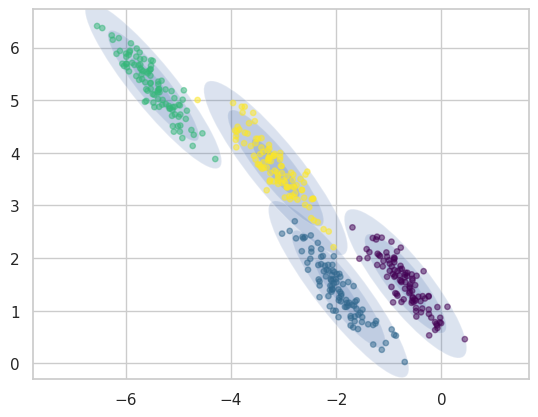

In [6]:
# GMM Clustering
gmm = GaussianMixture(n_components=4,
                      n_init = 1,  # default number of init = 1
                      covariance_type='full',
                      random_state=2,
                      init_params='random',
                      verbose=0)
print("* GMM result")
plot_gmm(gmm, data)
train_gmm(gmm, data)

In [7]:
# plot_gmm does not support for covariance_type : shperical or tied
# Please use train_gmm without plotting them to check the results
gmm = GaussianMixture(n_components=4,
                      n_init = 1,  # default number of init = 1
                      covariance_type='spherical',
                      random_state=2,
                      init_params='random',
                      verbose=0)
print("* GMM result")
train_gmm(gmm, data)

* GMM result
n_iter_: 16 	(converged_: True)
wegiths_: [0.12  0.503 0.247 0.129]
means_: [[-3.526  4.142]
 [-1.321  1.476]
 [-5.48   5.289]
 [-2.885  3.359]]
covariances_:
[0.1   0.423 0.218 0.08 ]
first 20 labels: [2 1 1 3 1 2 1 3 1 1 2 1 3 1 1 1 1 1 3 1] ...


* K-Means result
n_iter_: 4 
cluster_centers_:
[[-1.993  1.6  ]
 [-5.481  5.287]
 [-3.193  3.734]
 [-0.674  1.354]]
first 20 labels: [1 0 0 2 0 1 3 2 0 3 1 3 2 0 0 3 3 3 2 0] ...


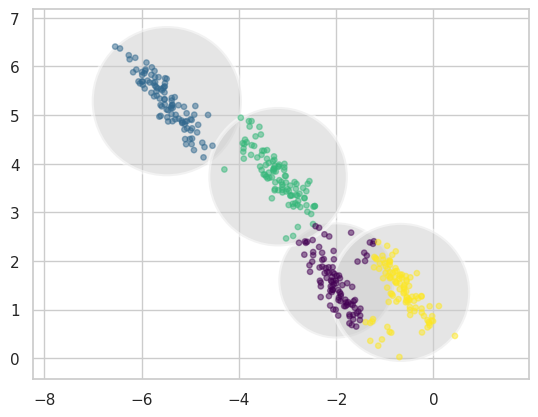

In [8]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4,
                n_init = 10, # default number of init = 10
                random_state=2)
print("* K-Means result")
plot_kmeans(kmeans, data)
train_kmeans(kmeans, data)

### Question 3 >>
* Briefly describe how the clusters are different (or the same) and why, then choose one
method.

* We can observe from the two plots that GMM and K-Means have different shape of clusters annd membership of datapoints. Specifically, GMM result shows a clearer shape of clusters compared to K-means by capturing ellipse shape of data distribution. For this type of data, I would choose GMM over K-means.

### Question 4: Explore the MIMIC-III data
* Apply GMM and K-means to the imputed MIMIC-III data set with any two numerical features.
* How differently GMM and K-means work with MIMIC-III data?

available features: ['SystolicBP' 'DiastolicBP' 'HeartRate' 'RespiratoryRate' 'Temperature'
 'MAP' 'PulseOx' 'FIO2' 'OxygenFlow' 'Procalcitonin' 'WBC' 'Bands' 'BUN'
 'Lactate' 'Platelet' 'Creatinine' 'BiliRubin' 'CReactiveProtein'
 'SedRate']
minic_data: the whole data without labels 


<ipython-input-2-42244d7322c2>:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')


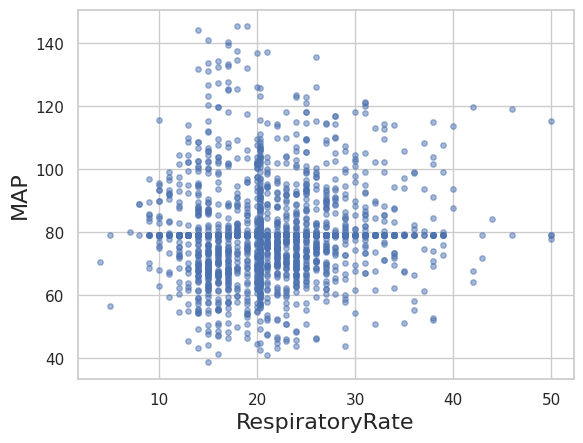

In [12]:
import pandas as pd
shock = pd.read_csv("/content/drive/MyDrive/week-4/3_W4S2_Code_Clustering/3_W4S2_Code_Clustering/imputed_mimic/mimic_shock.csv", header=0)
nonshock = pd.read_csv("/content/drive/MyDrive/week-4/3_W4S2_Code_Clustering/3_W4S2_Code_Clustering/imputed_mimic/mimic_nonshock.csv", header=0)
print("available features: {}".format(shock.columns[2:21].values))
feat = ['RespiratoryRate','MAP']

shockVids = shock.VisitIdentifier.unique().tolist()[:100]
nonshockVids = nonshock.VisitIdentifier.unique().tolist()[:100]

shockSelected = shock.loc[shock.VisitIdentifier.isin(shockVids), feat]
nonshockSelected = nonshock.loc[nonshock.VisitIdentifier.isin(nonshockVids),feat]

shock_data = shockSelected.values
nonshock_data = nonshockSelected.values
mimic_data = np.concatenate([shock_data, nonshock_data])

# Use mimic_data to train GMM, assuming we do not know the labels of shock / non-shock classes
print("minic_data: the whole data without labels ")
plot_scatter(mimic_data, xlabel=feat[0], ylabel=feat[1])

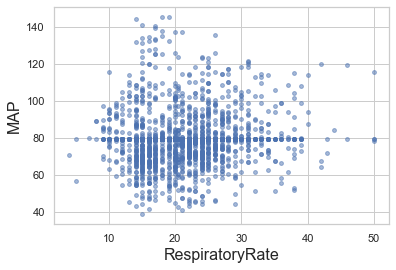

In [ ]:
# shock class
plot_scatter(shock_data, xlabel=feat[0], ylabel=feat[1])

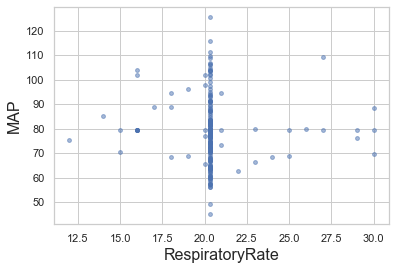

In [ ]:
# non-shock class
plot_scatter(nonshock_data, xlabel=feat[0], ylabel=feat[1])

* GMM result
n_iter_: 2 	(converged_: True)
wegiths_: [0.491 0.509]
means_: [[21.169 79.286]
 [21.409 79.454]]
covariances_:
[[[ 34.836   4.319]
  [  4.319 175.32 ]]

 [[ 39.281   6.565]
  [  6.565 176.838]]]
first 20 labels: [0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0] ...


<ipython-input-2-42244d7322c2>:26: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


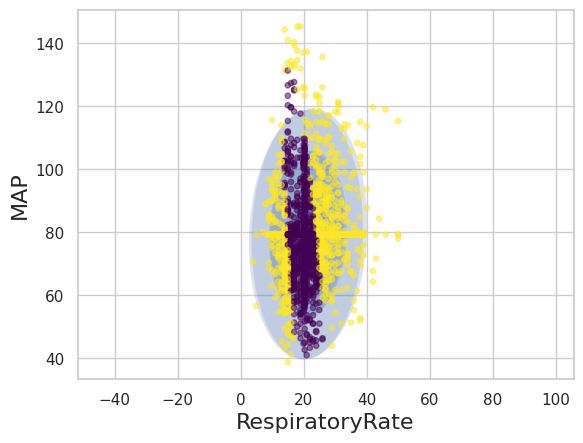

In [13]:
# GMM
gmm = GaussianMixture(n_components=2,
                      n_init = 1,  # default number of init = 1
                      covariance_type='full',
                      random_state=2,
                      init_params='random',
                      verbose=0)
print("* GMM result")
plot_gmm(gmm, mimic_data, xlabel=feat[0], ylabel=feat[1])
train_gmm(gmm, mimic_data)

* K-Means result
n_iter_: 8 
cluster_centers_:
[[ 21.171  75.425]
 [ 22.048 104.298]]
first 20 labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...


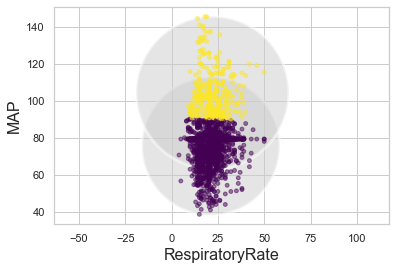

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2,
                n_init = 10, # default number of init = 10
                random_state=2)

print("* K-Means result")
plot_kmeans(kmeans, mimic_data,xlabel=feat[0], ylabel=feat[1])
train_kmeans(kmeans, mimic_data)

### Question 5: You may play with your own data or another dataset you generate
* You may artificially gerenate data with the below code and train them with GMM and K-means.
* Change the number of clusters (n_cluster). What happens if we have a different assumption of the number of clusters (n_components in GaussianMixture/ n_cluster in KMeans) from the actual latent number of clusters (centers in make_blobs)?
* Explore other hyper-parameters
* What are your findings, comparing GMM with K-means?

<ipython-input-2-42244d7322c2>:77: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=15, alpha=0.5, cmap='viridis')


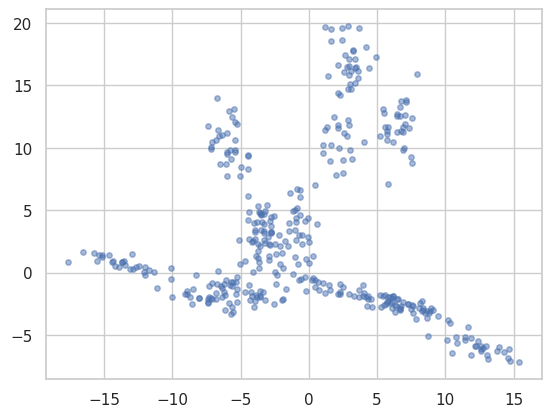

In [14]:
from sklearn.datasets import make_blobs   # scikit-learn version = 1.0.2
# if you fail to import the above, try this older version.
#from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=7,
                       cluster_std=0.99, random_state=1)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(7)
X1 = np.dot(X[:200], rng.randn(2, 2))  # make the first half of data skewed with random vectors
X2 = np.dot(X[200:], rng.randn(2, 2)) # make the second half of data skewed with random vectors
new_data = np.concatenate([X1, X2])
plot_scatter(new_data)

* GMM result


<ipython-input-2-42244d7322c2>:26: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


n_iter_: 26 	(converged_: True)
wegiths_: [0.206 0.219 0.308 0.266]
means_: [[ 4.059 13.363]
 [-8.455 -0.924]
 [-3.158  4.568]
 [ 7.014 -3.052]]
covariances_:
[[[ 4.284 -1.6  ]
  [-1.6   10.731]]

 [[15.859 -4.299]
  [-4.299  1.708]]

 [[ 4.381 -5.505]
  [-5.505 14.528]]

 [[18.214 -8.102]
  [-8.102  4.002]]]
first 20 labels: [3 1 3 3 3 1 1 1 1 1 3 1 1 3 1 3 1 3 1 1] ...


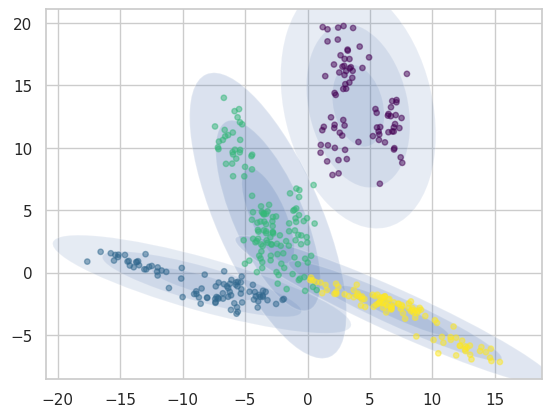

In [15]:
# GMM Clustering
gmm = GaussianMixture(n_components=4,  #### Explore different n_components
                      n_init = 10,  # default number of init = 1
                      covariance_type='full',
                      random_state=2,
                      init_params='random',
                      verbose=0)

print("* GMM result")
plot_gmm(gmm, new_data)
train_gmm(gmm, new_data)

* K-Means result
n_iter_: 5 
cluster_centers_:
[[-8.3   -0.914]
 [ 4.11  13.476]
 [ 7.806 -3.387]
 [-2.934  4.431]]
first 20 labels: [3 0 2 2 2 0 0 0 0 0 2 0 0 2 0 2 0 2 0 0] ...


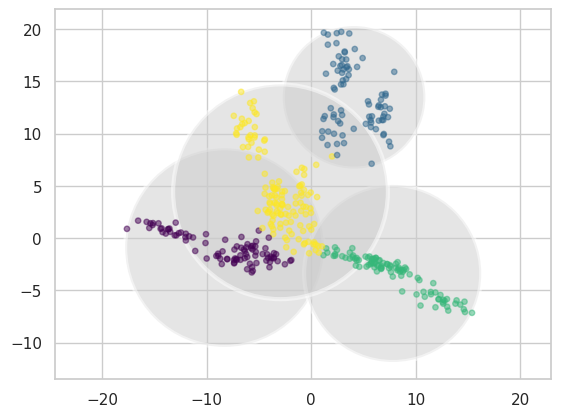

In [16]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4,  #### Explore different n_clusters
                n_init = 10, # default number of init = 10
                random_state=2)

print("* K-Means result")
plot_kmeans(kmeans, new_data)
train_kmeans(kmeans, new_data)